In [1]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import clusteringv15

In [2]:
# If required, create a face detection pipeline using MTCNN:
mtcnn = MTCNN(image_size=160, margin=0, post_process=False)

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [3]:
from PIL import Image

#img = Image.open('./lfw/Arnold_Schwarzenegger_0013.jpg')
#img = Image.open('./lfw/Augustin_Calleri_0004.jpg')
#img = Image.open('./lfw/Angelina_Jolie_0002.jpg')
#img = Image.open('./lfw/Angelina_Jolie_0013.jpg')
#img = Image.open('./lfw/Aaron_Sorkin_0002.jpg')
#img = Image.open('./lfw/Azra_Akin_0004.jpg')
#img = Image.open('./lfw/Arnold_Schwarzenegger_0033.jpg')
#img = Image.open('./lfw/Angelina_Jolie_0004.jpg')
img = Image.open('./lfw/Abid_Hamid_Mahmud_Al-Tikriti_0001.jpg')
#img = Image.open('./lfw/Abdullah_Gul_0014.jpg')
#img = Image.open('./lfw/Abdullah_Gul_0005.jpg')
#img = Image.open('./lfw/Abdullah_0001.jpg')


#img = Image.open('./knn_examples/train/obama/obama.jpg')
#img = Image.open('./test.png')



# Get cropped and prewhitened image tensor
img_cropped = mtcnn(img, save_path='./pytorch_save/img_1.jpg')

# Calculate embedding (unsqueeze to add batch dimension)
img_embedding = resnet(img_cropped.unsqueeze(0))

# Or, if using for VGGFace2 classification
resnet.classify = True
img_probs = resnet(img_cropped.unsqueeze(0))

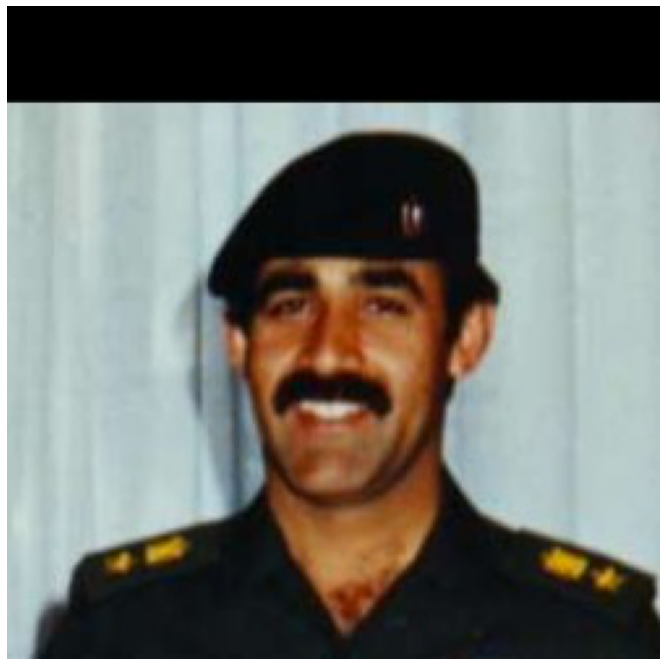

In [4]:
fig, ax = plt.subplots(figsize=(16, 12))
ax.axis('off')
ax.imshow(img)

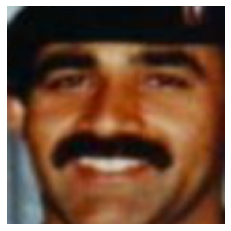

In [5]:
# Create face detector
mtcnn = MTCNN(image_size=160, margin=0, select_largest=False, post_process=False)

# Detect face
face = mtcnn(img, save_path='./test.png')

# Visualize
plt.imshow(face.permute(1, 2, 0).int().numpy())
plt.axis('off');

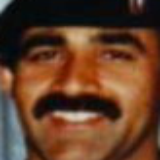

In [6]:
new_img = Image.open('./test.png')
new_img
#new_img.crop((nose[0], nose[3], nose[2], nose[1]))

In [7]:
boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)
eyes, nose, mouth = clusteringv15.get_feature_bboxes(new_img, boxes, landmarks)

Clear landmarks_savepath.


In [8]:
new_img.crop(eyes)

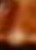

In [9]:
new_img.crop(nose)

In [10]:
new_img.crop(mouth)

In [11]:
import re
from os import listdir
listdir('data/input_data')
test_string = 'bild15.jpg'
pattern = '.*jpg|.*jpeg|.*png$'
data = []
for picture in listdir('data/input_data'):
    data.append(re.match(pattern, picture).string)

In [12]:
data

['01.jpg',
 '02.jpg',
 '03.jpg',
 '04.jpg',
 '05.jpg',
 '06.jpg',
 '07.jpg',
 '08.jpg',
 '09.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 'felix01.jpeg',
 'felix02.jpeg',
 'felix03.jpeg',
 'felix04.jpeg',
 'felix05.jpeg',
 'tristan01.jpeg']

<ipython-input-13-2ba63e0d9515>:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


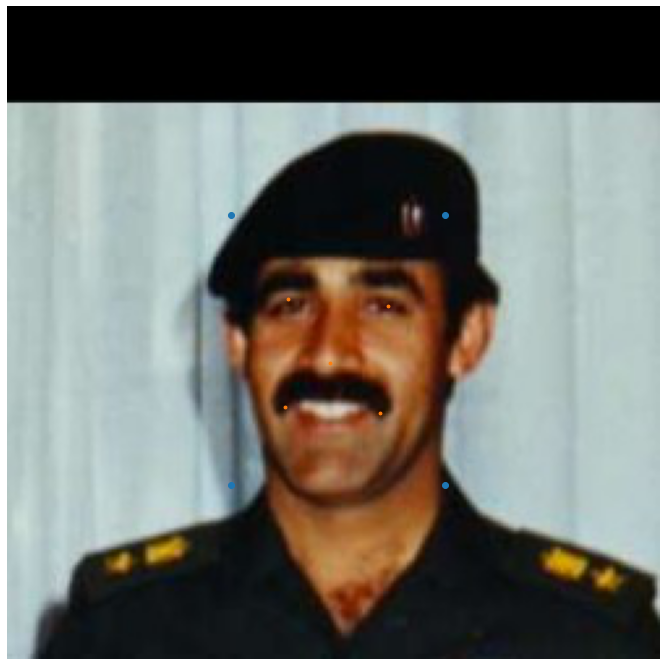

In [13]:
import matplotlib

# Detect face
boxes, probs, landmarks = mtcnn.detect(img, landmarks=True)

# Visualize
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(img)
ax.axis('off')

left_eye = (landmarks[0][0][0], landmarks[0][0][1])
right_eye = (landmarks[0][1][0], landmarks[0][1][1])
nose = (landmarks[0][2][0], landmarks[0][2][1])
mouth_left = (landmarks[0][3][0], landmarks[0][3][1])
mouth_right = (landmarks[0][4][0], landmarks[0][4][1])

top_left = (boxes[0][0], boxes[0][1])
top_right = (boxes[0][2], boxes[0][1])
bottom_left = (boxes[0][0], boxes[0][3])
bottom_right = (boxes[0][2], boxes[0][3])

box_width = top_right[0] - top_left[0]
box_height = bottom_left[1] - top_left[1]

left_eye_160 = (((left_eye[0]-top_left[0])/box_width)*160, ((left_eye[1]-top_left[1])/box_height)*160)
right_eye_160 = (((right_eye[0]-top_left[0])/box_width)*160, ((right_eye[1]-top_left[1])/box_height)*160)
nose_160 = (((nose[0]-top_left[0])/box_width)*160, ((nose[1]-top_left[1])/box_height)*160)
mouth_left_160 = (((mouth_left[0]-top_left[0])/box_width)*160, ((mouth_left[1]-top_left[1])/box_height)*160)
mouth_right_160 = (((mouth_right[0]-top_left[0])/box_width)*160, ((mouth_right[1]-top_left[1])/box_height)*160)

# Eyes
eyes_rect = matplotlib.patches.Rectangle((left_eye[0]-15,left_eye[1]-4), right_eye[0]-left_eye[0]+30, right_eye[1]-left_eye[1]+8, linewidth=0, edgecolor='black', facecolor='black')
#ax.add_patch(eyes_rect)

# Nose
nose_rect = matplotlib.patches.Rectangle((nose[0]-12,nose[1]-(nose[1]-((left_eye[1]+right_eye[1])/2))+5), 24, nose[1]-((left_eye[1]+right_eye[1])/2), linewidth=0, edgecolor='black', facecolor='black')
#ax.add_patch(nose_rect)

# Mouth
mouth_rect = matplotlib.patches.Rectangle((mouth_left[0]-5,mouth_left[1]-((mouth_right[1]+mouth_left[1])/2-nose[1])/2), mouth_right[0]-mouth_left[0]+10, (mouth_right[1]+mouth_left[1])/2-nose[1], linewidth=0, edgecolor='black', facecolor='black')
#ax.add_patch(mouth_rect)

for box, landmark in zip(boxes, landmarks):
    ax.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8)
plt.axis('off');
fig.show()

In [14]:
mouth

(34, 101, 116, 128)